In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [74]:
#Loading the dataset
df = pd.read_csv('customer_segmentation.csv',index_col=None)

# EDA

In [35]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [37]:
df.shape

(541909, 9)

In [38]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [55]:
df.describe

<bound method NDFrame.describe of          index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         

In [43]:
# printing total numbers of Unique value in the dataframe. 
df.nunique()

index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

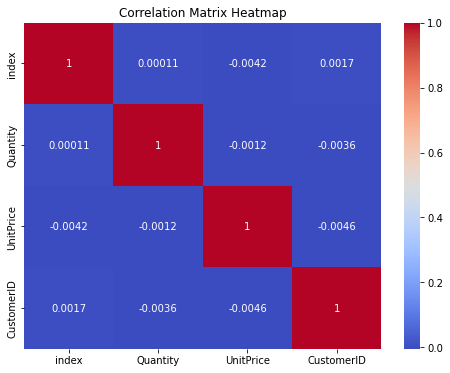

In [44]:
# Create a correlation matrix
corr = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Preprocessing

In [75]:
# drop missing values aand columns
missing_count=df.isnull().sum() #the count of missing values
value_count= df.isnull().count()#the count of all values
missing_percentage= round(missing_count/value_count*100,2)#the percentage of missing values
missing_df= pd.DataFrame({'count': missing_count,'percentage':missing_percentage })#create a dataframe
print(missing_df)

              count  percentage
index             0        0.00
InvoiceNo         0        0.00
StockCode         0        0.00
Description    1454        0.27
Quantity          0        0.00
InvoiceDate       0        0.00
UnitPrice         0        0.00
CustomerID   135080       24.93
Country           0        0.00


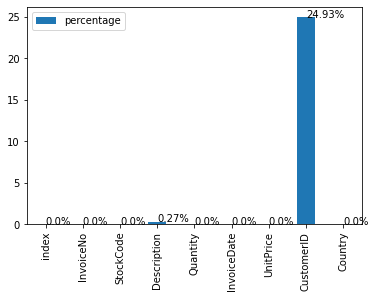

In [76]:
barchart=missing_df.plot.bar(y= 'percentage')

for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+"%")

In [77]:
# Drop duplicates and missing values

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop(['index'],axis=1, inplace=True)
df.shape

(406829, 8)

In [78]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Feature engineeing

In [79]:
# convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [80]:
# MRF table
import datetime as dt

# calculate recency, frequency, and monetary value
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum',
    'Quantity': 'sum'
})

customers.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'MonetaryValue',
    'Quantity': 'QuantityValue'
}, inplace=True)


In [81]:
from sklearn.preprocessing import StandardScaler

# normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(customers)


# Choose the optimal K

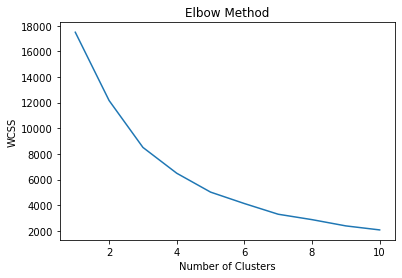

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Clustering

In [98]:
# apply k-means clustering
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(data)
clusters = kmeans.predict(data)

# add cluster labels to the customers dataframe
customers['Cluster'] = clusters

In [99]:
customers.head()

,Recency,Frequency,MonetaryValue,QuantityValue,Cluster
CustomerID,,,,,
12346.0,326,2,2.08,0,2
12347.0,2,7,481.21,2458,0
12348.0,75,4,178.71,2341,0
12349.0,19,1,605.10,631,0
12350.0,310,1,65.30,197,2


In [100]:
# analyze the characteristics of each cluster
cluster_analysis = customers.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})

print(cluster_analysis)

            Recency   Frequency  MonetaryValue
Cluster                                       
0         44.618417    3.836561     224.737568
1         40.142857  109.428571   28197.814286
2        250.342750    1.793785      98.518984
3         14.287390   20.615836    1141.452053
4          2.000000   77.000000    5400.210000
5          5.500000   62.277778    2765.004444


# Visualization

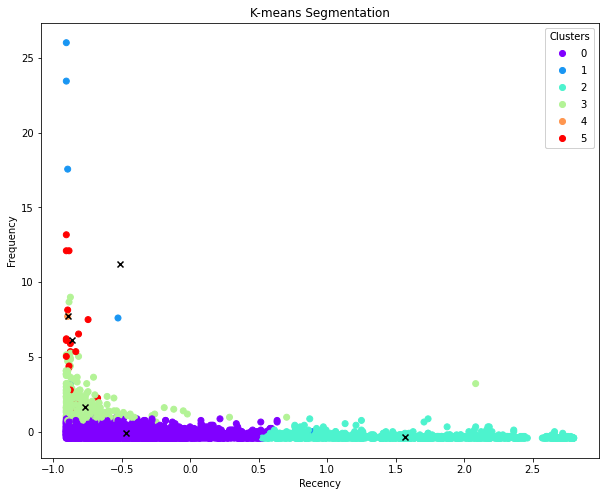

In [101]:
import matplotlib.pyplot as plt

# create a figure with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# plot the K-means result
scatter = ax.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow')

# plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')

ax.set_title('K-means Segmentation')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

# add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.show()


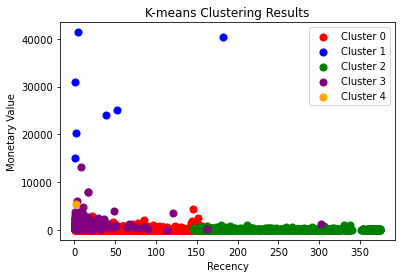

In [102]:
# plot the clusters based on Recency and MonetaryValue
plt.scatter(customers[customers.Cluster == 0].Recency, customers[customers.Cluster == 0].MonetaryValue, s=50, c='red', label='Cluster 0')
plt.scatter(customers[customers.Cluster == 1].Recency, customers[customers.Cluster == 1].MonetaryValue, s=50, c='blue', label='Cluster 1')
plt.scatter(customers[customers.Cluster == 2].Recency, customers[customers.Cluster == 2].MonetaryValue, s=50, c='green', label='Cluster 2')
plt.scatter(customers[customers.Cluster == 3].Recency, customers[customers.Cluster == 3].MonetaryValue, s=50, c='purple', label='Cluster 3')
plt.scatter(customers[customers.Cluster == 4].Recency, customers[customers.Cluster == 4].MonetaryValue, s=50, c='orange', label='Cluster 4')

# add labels and title
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('K-means Clustering Results')

# add legend to upper right corner
plt.legend(loc='upper right')

# show the plot
plt.show()
